In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
X = df.drop(columns=['target','flower_name'],axis='columns')
y = df.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [20]:
model.score(X_test,y_test)

0.9666666666666667

In [21]:
model.predict([[4.8,3.0,1.5,0.3]])

c:\Users\sunci\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [22]:
model_C = SVC(C=1)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

0.9666666666666667

In [24]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [25]:
model_g = SVC(gamma=10)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.9333333333333333

In [27]:
model_kernel = SVC(kernel='linear')
model_kernel.fit(X_train,y_train)
model_kernel.score(X_test,y_test)

0.9666666666666667

In [28]:
y_pred = model_kernel.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


In [30]:
from sklearn import metrics

print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.9666666666666667


In [37]:
print("precision:",metrics.precision_score(y_test,y_pred,average='macro'))

precision: 0.9696969696969697


In [38]:
print("recall:",metrics.recall_score(y_test,y_pred,average='macro'))

recall: 0.9583333333333334


In [40]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [43]:
from matplotlib.colors import ListedColormap
X = iris.data[:,:2]
y = iris.target

C = 1.0
svc = SVC(kernel='linear',C=1).fit(X,y)

In [46]:
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
h = (x_max/x_min)/100
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

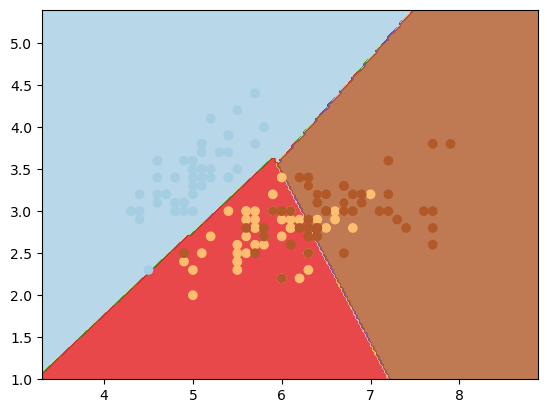

In [50]:
plt.subplot(1,1,1)
Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':(1,10,100,1000),'kernel':('rbf','linear'),'gamma':(0.1,0.01,0.001,0.0001)}

grid_search = GridSearchCV(svc,param_grid,cv=10,verbose=10)

grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10; 1/32] START C=1, gamma=0.1, kernel=rbf................................
[CV 1/10; 1/32] END .C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10; 1/32] START C=1, gamma=0.1, kernel=rbf................................
[CV 2/10; 1/32] END .C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/10; 1/32] START C=1, gamma=0.1, kernel=rbf................................
[CV 3/10; 1/32] END .C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10; 1/32] START C=1, gamma=0.1, kernel=rbf................................
[CV 4/10; 1/32] END .C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10; 1/32] START C=1, gamma=0.1, kernel=rbf................................
[CV 5/10; 1/32] END .C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10; 1/32] START C=1, gamma=0.1, kernel=rbf................................
[CV 6/10; 1/32] END .C=1, gamma=0.1, kernel=rb

GridSearchCV(cv=10, estimator=SVC(C=1, kernel='linear'),
             param_grid={'C': (1, 10, 100, 1000),
                         'gamma': (0.1, 0.01, 0.001, 0.0001),
                         'kernel': ('rbf', 'linear')},
             verbose=10)

In [55]:
print("params:",grid_search.best_params_)
print("accuracy: ",grid_search.best_score_)

params: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
accuracy:  0.975
